<a href="https://colab.research.google.com/github/DeepakRautella/google_collab/blob/main/weight_initilization_what_not__to_do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

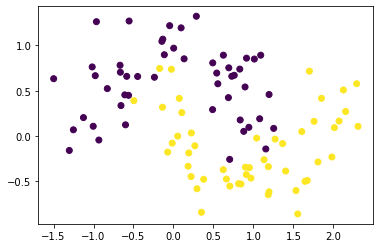

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# **If Intially all weight initilized as zero**
1) in sigmoid case

In [4]:
model1 = Sequential()
model1.add(Dense(2,activation='sigmoid',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Set parameters to 0
model1.get_weights()

[array([[-0.21921468,  0.4309411 ],
        [-0.51141715,  0.39788127]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.4546293],
        [ 0.7010757]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
initial_weights = model1.get_weights()

In [8]:
initial_weights[0] = np.ones(model1.get_weights()[0].shape)*0.0
initial_weights[1] = np.ones(model1.get_weights()[1].shape)*0.0
initial_weights[2] = np.ones(model1.get_weights()[2].shape)*0.0
initial_weights[3] = np.ones(model1.get_weights()[3].shape)*0.0

In [10]:
model1.set_weights(initial_weights)

In [12]:
model1.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32), array([0., 0.], dtype=float32), array([[0.],
        [0.]], dtype=float32), array([0.], dtype=float32)]

In [13]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history = model1.fit(X,y,epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.6784 - accuracy: 0.5375 - val_loss: 0.7122 - val_accuracy: 0.3500
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6781 - accuracy: 0.5375 - val_loss: 0.7121 - val_accuracy: 0.3500
Epoch 3/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6779 - accuracy: 0.5375 - val_loss: 0.7121 - val_accuracy: 0.3500
Epoch 4/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6776 - accuracy: 0.5375 - val_loss: 0.7120 - val_accuracy: 0.3500
Epoch 5/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6774 - accuracy: 0.5375 - val_loss: 0.7119 - val_accuracy: 0.3500
Epoch 6/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6771 - accuracy: 0.5375 - val_loss: 0.7117 - val_accuracy: 0.3500
Epoch 7/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6769 - accuracy: 0.5375 - val_loss: 0.7117 - val_accuracy: 0.3500
Epoch 8/1000


In [18]:
model1.get_weights()

[array([[ 1.2288356,  1.2288356],
        [-3.263298 , -3.263298 ]], dtype=float32),
 array([-0.66940445, -0.66940445], dtype=float32),
 array([[2.020055],
        [2.020055]], dtype=float32),
 array([-1.3148303], dtype=float32)]

3888/3888 [==============================] - 5s 1ms/step


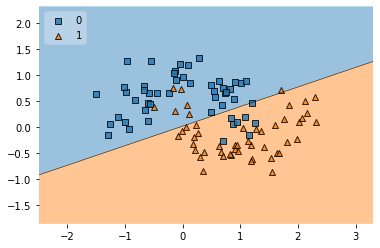

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

in sigmoid case : if weight is zero then our equation will be zero and our output in case of sigmoid will be 0.5 so our weight will keep updating

## in case of **relu** or **tanh**

In [21]:
model2 = Sequential()
model2.add(Dense(2,activation='relu',input_dim=2))
model2.add(Dense(1,activation='relu'))
initial_weights = model1.get_weights()
initial_weights[0] = np.ones(model1.get_weights()[0].shape)*0
initial_weights[1] = np.ones(model1.get_weights()[1].shape)*0
initial_weights[2] = np.ones(model1.get_weights()[2].shape)*0
initial_weights[3] = np.ones(model1.get_weights()[3].shape)*0
model2.set_weights(initial_weights)
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(X,y,epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 69ms/step - loss: 8.2909 - accuracy: 0.4625 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 8.2909 - accuracy: 0.4625 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 3/1000
3/3 [==============================] - 0s 12ms/step - loss: 8.2909 - accuracy: 0.4625 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 4/1000
3/3 [==============================] - 0s 12ms/step - loss: 8.2909 - accuracy: 0.4625 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 5/1000
3/3 [==============================] - 0s 12ms/step - loss: 8.2909 - accuracy: 0.4625 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 6/1000
3/3 [==============================] - 0s 12ms/step - loss: 8.2909 - accuracy: 0.4625 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 7/1000
3/3 [==============================] - 0s 12ms/step - loss: 8.2909 - accuracy: 0.4625 - val_loss: 5.3987 - val_accuracy: 0.6500
Epoch 8/1000


3888/3888 [==============================] - 7s 2ms/step


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


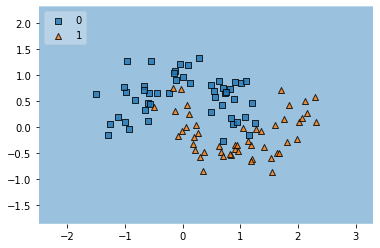

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)

**Relu** or **Tanh** both activation function formulae give output zero if input is zero . so there will be no weight updated even with 1000 epochs

In [24]:
model2.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32), array([0., 0.], dtype=float32), array([[0.],
        [0.]], dtype=float32), array([0.], dtype=float32)]

# In case if all weights will be initilized as constant 

**Sigmoid , Relu and Tanh**


In [29]:
model3 = Sequential()
model3.add(Dense(2,activation='sigmoid',input_dim=2))
model3.add(Dense(1,activation='sigmoid'))
initial_weights = model3.get_weights()
initial_weights[0] = np.ones(model3.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model3.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model3.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model3.get_weights()[3].shape)*0.5
model3.set_weights(initial_weights)
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history3 = model3.fit(X,y,epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 73ms/step - loss: 0.8167 - accuracy: 0.5375 - val_loss: 1.0154 - val_accuracy: 0.3500
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.8147 - accuracy: 0.5375 - val_loss: 1.0120 - val_accuracy: 0.3500
Epoch 3/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.8127 - accuracy: 0.5375 - val_loss: 1.0087 - val_accuracy: 0.3500
Epoch 4/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.8107 - accuracy: 0.5375 - val_loss: 1.0055 - val_accuracy: 0.3500
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8089 - accuracy: 0.5375 - val_loss: 1.0023 - val_accuracy: 0.3500
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.8070 - accuracy: 0.5375 - val_loss: 0.9992 - val_accuracy: 0.3500
Epoch 7/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.8053 - accuracy: 0.5375 - val_loss: 0.9960 - val_accuracy: 0.3500
Epoch 8/1000


3888/3888 [==============================] - 5s 1ms/step


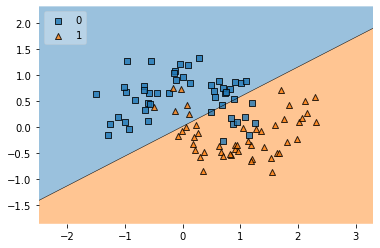

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model3, legend=2)


In [32]:
model3.get_weights()

[array([[ 1.3200632,  1.3200632],
        [-2.3098388, -2.3098388]], dtype=float32),
 array([-0.83229613, -0.83229613], dtype=float32),
 array([[1.4067802],
        [1.4067802]], dtype=float32),
 array([-0.8342376], dtype=float32)]

if we use constant values in every biase then each individual perceptron will work on same values or equation it mean all perceptron working same task-- wastage of resources and times and will not achieve good result and will not capture non linear relation

## **If value of weights initilized too low or too high**

In [57]:
model4 = Sequential()
model4.add(Dense(2,activation='tanh',input_dim=2))
model4.add(Dense(2,activation='tanh'))
model4.add(Dense(2,activation='tanh'))
model4.add(Dense(2,activation='tanh'))
model4.add(Dense(1,activation='sigmoid'))
initial_weights = model4.get_weights()
initial_weights[0] = np.ones(model4.get_weights()[0].shape)*0.001
initial_weights[1] = np.ones(model4.get_weights()[1].shape)*0.002
initial_weights[2] = np.ones(model4.get_weights()[2].shape)*0.003
initial_weights[3] = np.ones(model4.get_weights()[3].shape)*0.001
initial_weights[4] = np.ones(model4.get_weights()[4].shape)*0.0022
initial_weights[5] = np.ones(model4.get_weights()[5].shape)*0.0011
initial_weights[6] = np.ones(model4.get_weights()[6].shape)*0.0012
initial_weights[7] = np.ones(model4.get_weights()[7].shape)*0.0013
initial_weights[8] = np.ones(model4.get_weights()[8].shape)*0.0014
initial_weights[9] = np.ones(model4.get_weights()[9].shape)*0.0015

model4.set_weights(initial_weights)
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model4.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 77ms/step - loss: 0.6931 - accuracy: 0.5375 - val_loss: 0.6936 - val_accuracy: 0.3500
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.6936 - val_accuracy: 0.3500
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.6937 - val_accuracy: 0.3500
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.6939 - val_accuracy: 0.3500
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.6941 - val_accuracy: 0.3500
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6929 - accuracy: 0.5375 - val_loss: 0.6942 - val_accuracy: 0.3500
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6929 - accuracy: 0.5375 - val_loss: 0.6943 - val_accuracy: 0.3500
Epoch 8/100
3/3 [===

3888/3888 [==============================] - 6s 1ms/step


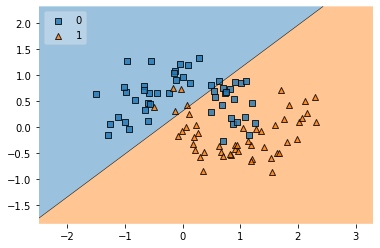

In [58]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model4, legend=2)


In [56]:
model4.get_weights()

[array([[-0.3235647 ,  0.42759395],
        [-0.3204283 ,  0.13321328]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.53050387,  0.23373854],
        [ 0.9557258 , -0.98410964]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.45595664, -0.6057005 ],
        [ 0.98700917, -0.67002296]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.592417  , -0.55101585],
        [ 1.0987047 ,  0.735976  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.3372881 ],
        [-0.25983393]], dtype=float32),
 array([0.], dtype=float32)]

**In case of low weights sigmoid or tanh function**
our inputs are normalised beween 0-1 and in eq for one perceptron is ∑WiXi it mean weight * X  
suppose w=0.01 and x=0.2  
 w*x=0.002 same with all other inputs, and if overall sum inside tanh or sigmoid activation function is almost near to zero (~0.0002) then there activation output will be almost near to zero then
during next node/ hidden layer there value will keep getting close to zero 

and during gradient or backproportion there derivative will be almost too small or close to zero and weight updation will be too slow or no weight update
in deep neuron network  
**vanishing gradient problem occurs**

**Relu** compare to other sigmoid and tanh less vanishing gradient but convergence of model will be too slow in relu

# If Weight will initilized too high

**Relu**

In [59]:
model5 = Sequential()
model5.add(Dense(2,activation='relu',input_dim=2))
model5.add(Dense(2,activation='relu'))
model5.add(Dense(2,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))
initial_weights = model5.get_weights()
initial_weights[0] = np.ones(model5.get_weights()[0].shape)*1
initial_weights[1] = np.ones(model5.get_weights()[1].shape)*1.01
initial_weights[2] = np.ones(model5.get_weights()[2].shape)*2.02
initial_weights[3] = np.ones(model5.get_weights()[3].shape)*1.5
initial_weights[4] = np.ones(model4.get_weights()[4].shape)*2.1

model5.set_weights(initial_weights)
model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history5 = model5.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 85ms/step - loss: 28.1209 - accuracy: 0.5375 - val_loss: 30.2926 - val_accuracy: 0.3500
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 27.8822 - accuracy: 0.5375 - val_loss: 30.0225 - val_accuracy: 0.3500
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 27.6308 - accuracy: 0.5375 - val_loss: 29.7558 - val_accuracy: 0.3500
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 27.3819 - accuracy: 0.5375 - val_loss: 29.4892 - val_accuracy: 0.3500
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 27.1483 - accuracy: 0.5375 - val_loss: 29.2242 - val_accuracy: 0.3500
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 26.9068 - accuracy: 0.5375 - val_loss: 28.9644 - val_accuracy: 0.3500
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 26.6521 - accuracy: 0.5375 - val_loss: 28.7068 - val_accuracy: 0.3500
Epoch 

3888/3888 [==============================] - 6s 1ms/step


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


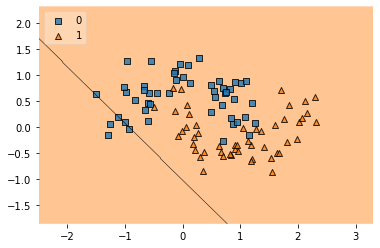

In [60]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model5, legend=2)


In [60]:
model5.get_weights()

**Relu**

in case of relu if value of weights too high then according to relu activation formulae  max(0,x) max value of x will be taken which is much high then actual inputs 
suppose : x=.5 w=2.01  x*w=.1005 and sum of all XiWi will be higher and during backproportion derviative will be higher too which lead to change in gradient much frequent ( in zig zag form) lead to less chance to achieve global minima

**sigmoid or tanh**
in case of sigmoid or tanh higher the value of weights lead to higher input in activation function 
highest value of tanh or sigmoid activation gives saturated values 1 or -1  or 0 or 1 which lead to slow convergence or vanishing gradient problem occurs